
# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The data set is about movies from 1960 decade to 2010 decade.It has 10k movies with info about their revenue,budget,release year...etc.My goal is to see if the increase in the number of movies released ingeneral can affect the profit ? 


### Question(s) for Analysis
>1)how  profits of the movies changed over the past decades?
>2)How does the number of movies released  have changed over the past decades?
>3)what are the movies with the highest and lowest profits in this data set?
>4)which directors have most movies top(5)? 
>5)what is the total sum of the profit of all the movies that each of these top 5 directors directed?
>6)which production comapnies have produced the most number of movies top 5?
>7)what is the total sum of the profit of all the movies that these top 5 production compaines have produced?
>8)Is there a relationship between the number of movies that the production companies produce and the profits they earn?
 

In [201]:
# Import all libraries that i need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling






In [202]:
#Loading my data and having a look at it
df=pd.read_csv('C:\\Users\\PC\\Desktop\\jupyter project\\project\\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [203]:
# Previous data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [204]:
# Preview stats for each columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


In [205]:
# Delete unnecessary columns
removed_columns=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline', 'overview', 'vote_count', 'vote_average','genres','release_date','cast']
df.drop(removed_columns, axis=1, inplace=True)
df.head()

,budget,revenue,original_title,director,runtime,production_companies,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,110000000,295238201,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,190000000,1506249360,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2015


In [206]:
#checking for duplicates
df.duplicated().sum()

1

In [207]:
#checking for Null values
df.isnull().sum()

budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
production_companies    1030
release_year               0
dtype: int64

In [208]:
#dropping duplicates and Null values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [209]:
#cheking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9814 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   budget                9814 non-null   int64 
 1   revenue               9814 non-null   int64 
 2   original_title        9814 non-null   object
 3   director              9814 non-null   object
 4   runtime               9814 non-null   int64 
 5   production_companies  9814 non-null   object
 6   release_year          9814 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 613.4+ KB


In [210]:
#replacing all the values of zero with nulls so we can delete them later
columns = ['budget', 'revenue']
df[columns]=df[columns].replace(0,np.nan)


In [211]:
#deleting the null values
df.dropna(inplace=True)

In [212]:
#cehck if there is any null value remaining
df.isnull().sum()

budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
production_companies    0
release_year            0
dtype: int64

In [213]:
#calcualting the profit of each movie and adding a whole column for it in our dataframe
df['profit'] = df['revenue'] - df['budget']

In [214]:
#here is how our data frame looks like
df.head()

,budget,revenue,original_title,director,runtime,production_companies,release_year,profit
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015,1.363529e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015,2.284364e+08
2,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.852382e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.868178e+09
4,190000000.0,1.506249e+09,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2015,1.316249e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Our data is clean and well now, so we are ready to go


### Research Question 1 (how  profits of the movies changed over the past decades?)

In [215]:
#taking a copy of our original frame because we are going to do some changes in the release_year column
Profits_of_Decades=df.copy()
#we want our years to be in terms of decades 
Profits_of_Decades['release_year']=((Profits_of_Decades['release_year']//10)*10).astype('int64')

Text(0.5, 1.0, 'the Average profit of movies per decade')

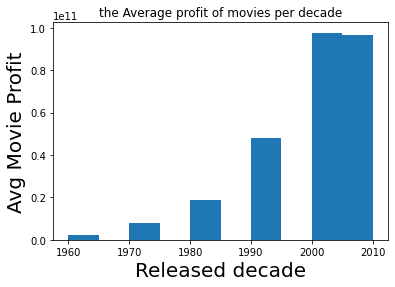

In [216]:
#displaying how the profits of the movies changed over the past decades
plt.hist(Profits_of_Decades['release_year'],weights=Profits_of_Decades['profit'])
plt.xlabel('Released decade', fontsize = 20)
plt.ylabel('Avg Movie Profit', fontsize = 20)
plt.title('the Average profit of movies per decade')

###As its shown as decades are passing the profits are increasing tremendously 

### Research Question 2  (How does the number of movies released have changed over the past decades?)

<AxesSubplot:title={'center':'number of movies release per decade'}, xlabel='release_year', ylabel='number of movies'>

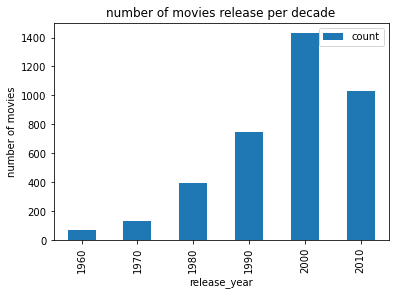

In [217]:
#Here we are counting the number of movies that have been released every decade
Profits_of_Decades.groupby('release_year').original_title.agg(['count']).plot(kind='bar',ylabel='number of movies',title='number of movies release per decade')

we can see that the number of movies being released in the past decades have been increasing except for the last decade 
but from the prev figure we can recogize that this didn't affect the profit that was earned that much


### Research Question 3  (what are the movies with the highest and lowest profits in this data set)?

In [218]:
#Here we are first searching for the least profit in our data frame and then we are looking for the row that has this value
value_low=df['profit'].min()
Least_movie=df.loc[df['profit'] ==value_low]




In [219]:
#Here we are first searching for the Highest profit in our data frame and then we are looking for the row that has this value
value_high=df['profit'].max()
Highest_movie=df.loc[df['profit'] == value_high]


In [220]:
Least_movie.head()

,budget,revenue,original_title,director,runtime,production_companies,release_year,profit
2244,425000000.0,11087569.0,The Warrior's Way,Sngmoo Lee,100,Boram Entertainment Inc.,2010,-413912431.0


Seems like The Warrior's Way Has to be the least movie in terms of earning profit
infact the movie's budget was way too more than its revenue

In [221]:
Highest_movie.head()

,budget,revenue,original_title,director,runtime,production_companies,release_year,profit
1386,237000000.0,2.781506e+09,Avatar,James Cameron,162,Ingenious Film Partners|Twentieth Century Fox ...,2009,2.544506e+09


Avatar seems to be the highest

Text(0.5, 1.0, 'The Highest and Least Profit of the Movies')

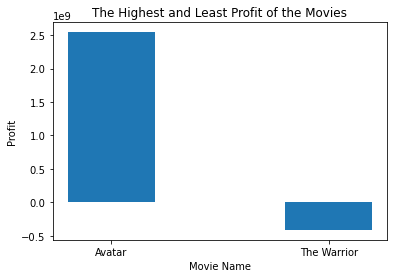

In [222]:
values=[value_high,value_low]
Names=['Avatar','The Warrior']
plt.bar(Names, values,
        width = 0.4)
plt.xlabel("Movie Name")
plt.ylabel("Profit")
plt.title("The Highest and Least Profit of the Movies")


comparing between the 2 movies in this graph

### Research Question 4 ( which directors have most movies top(5)) ?

<AxesSubplot:title={'center':'Top 5 directors and the number of movies they have'}, xlabel='Director Name', ylabel='Number of movies'>

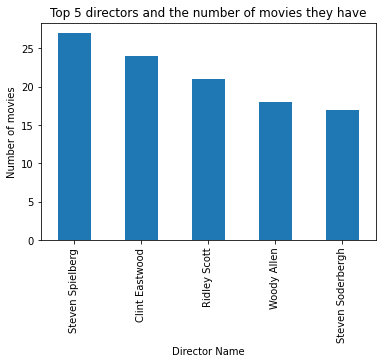

In [223]:
#Plotting the top 5 directors that has directed the most number of movies
df['director'].value_counts().head(5).plot(kind='bar' ,title='Top 5 directors and the number of movies they have' ,xlabel='Director Name',ylabel='Number of movies')

seems like Steven Spielberg is the highest with 27 movies

In [224]:
df['director'].value_counts().head(5)

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
Name: director, dtype: int64

### Research Question 5 (what is the total sum of the profit of all the movies that each of these top 5 directors directed)?

In [225]:
#creating new dfs for each director with its occurances in our data frame so we can calculate the total profits for his movie
S_Sp=df.loc[df['director'] == 'Steven Spielberg']
C_E=df.loc[df['director'] == 'Clint Eastwood']
R_S=df.loc[df['director'] == 'Ridley Scott']
W_A=df.loc[df['director'] == 'Woody Allen']
S_So=df.loc[df['director'] == 'Steven Soderbergh']
NamesF=['Steven Spielberg','Clint Eastwood','Ridley Scott','Woody Allen','Steven Soderbergh']

In [226]:
#getting the profit for each movie
Total1 = S_Sp['profit'].sum()
Total2 = C_E['profit'].sum()
Total3 = R_S['profit'].sum()
Total4 = W_A['profit'].sum()
Total5 = S_So['profit'].sum()
TotalsF=[Total1,Total2,Total3,Total4,Total5]

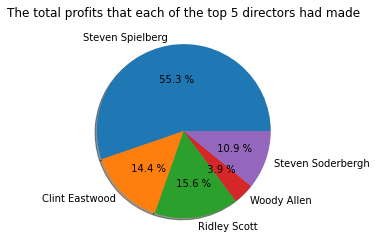

In [227]:

# plt.bar(Names, Totals,width = 0.01 )
# plt.xlabel("Director Name")
# plt.ylabel("profit")
# plt.title("The sum of the total profits that each of the top 5 directors had made")
# plt.show()
plt.pie(TotalsF,labels=NamesF,autopct ='% 1.1f %%', shadow = True)
plt.title('The total profits that each of the top 5 directors had made')
plt.show()



As we can recognise Steven Spielberg movies have made the highest profits and also he was the director with most movies, however the diffrence bettween the number of movies he has made and the other 4 directors isn't that big.


we can also notice that Ridely scott has less movies than Clint Eastwood yet his movies have made highest profits than him

lets see in the remaning research questions about the productions companies how the number of movies can affect the number of profits made

### Research Question 6 (which production comapnies have produced the most number of movies top (5))?

In [228]:
#since the column of the production companies carries multiple values sperated by | we need to first seperate them
#taking a copy of our original data frame to apply the changes
df1 = df.copy()

In [229]:
#seprating all the companies that has | as a seprator
df1['production_companies'] = df1['production_companies'].apply(lambda x: x.split("|")[0])


In [230]:
#counting the number of movies produced by each company
m=df1['release_year'].groupby([df1.production_companies]).agg('count')


<AxesSubplot:title={'center':'Top 5 production companies according to the number of movies they have'}, xlabel='production_companies', ylabel='number of movies'>

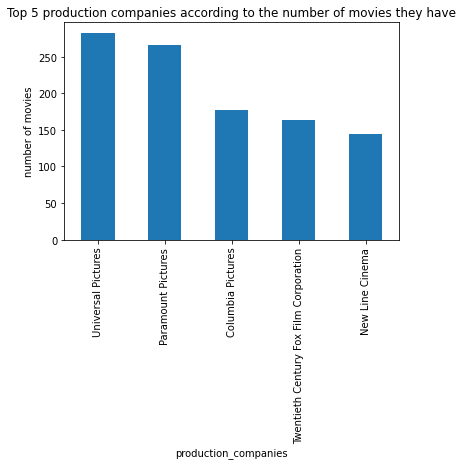

In [231]:
#sorting the results descendinlgy then seeing the top 5
m.sort_values( axis=0, ascending=False, inplace=True, kind='quicksort')
m.head(5).plot(kind='bar',title='Top 5 production companies according to the number of movies they have' ,ylabel='number of movies')

In [232]:
m.head(10)

production_companies
Universal Pictures                        283
Paramount Pictures                        266
Columbia Pictures                         177
Twentieth Century Fox Film Corporation    164
New Line Cinema                           144
Walt Disney Pictures                      117
Miramax Films                              78
Warner Bros.                               75
Columbia Pictures Corporation              67
Village Roadshow Pictures                  66
Name: release_year, dtype: int64

seems like Universal Pictures has the highest number of movies produced

### Research Question 7()what is the total sum of the profit of all the movies that these top 5 production compaines have produced)?


In [233]:
#creating new dfs for each prodcuction company with its occurances in our data frame so we can calculate the total profits for his movie

P_P=df.loc[df['production_companies'] == 'Paramount Pictures']
U_P=df.loc[df['production_companies'] == 'Universal Pictures']
C_P=df.loc[df['production_companies'] == 'Columbia Pictures']
N_L_C=df.loc[df['production_companies'] == 'New Line Cinema']
T_C_F_F_C=df.loc[df['production_companies'] == 'Twentieth Century Fox Film Corporation']



Names=['Paramount Pictures','Universal Pictures','Columbia Pictures','New Line Cinema','Twentieth Century Fox Film Corporation']

In [234]:
#getting the profit for each movie
Total1 = P_P['profit'].sum()
Total2 = U_P['profit'].sum()
Total3 = C_P['profit'].sum()
Total4 = N_L_C['profit'].sum()
Total5 =T_C_F_F_C['profit'].sum()
Totals=[Total1,Total2,Total3,Total4,Total5]

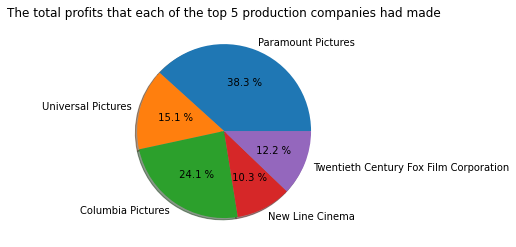

In [235]:

plt.pie(Totals[0:5],labels=Names,autopct ='% 1.1f %%', shadow = True)
plt.title('The total profits that each of the top 5 production companies had made')
plt.show()


As we can see paramount pictures have made the highest profit although universal pictures have produced more movies

# Research Question 8()Is there a relationship between the number of movies that the production companies produce and the profits they earn)?

In [236]:
#gathering more data for the  number 6-10 prodction companies interms of the number of movies they produced
V_R_P=df.loc[df['production_companies'] == 'Village Roadshow Pictures']
W_D_P=df.loc[df['production_companies'] == 'Walt Disney Pictures']
M_F=df.loc[df['production_companies'] == 'Miramax Films']
W_B=df.loc[df['production_companies'] == 'Warner Bros.']
C_P_C=df.loc[df['production_companies'] == 'Columbia Pictures Corporation']

#calculating their profits
Total6 = V_R_P['profit'].sum()
Total7 =W_D_P['profit'].sum()
Total8 = M_F['profit'].sum()
Total9 = W_B['profit'].sum()
Total10 =C_P_C['profit'].sum()
Totals.extend([Total6,Total7,Total8,Total9,Total10])

Text(0, 0.5, 'Profit')

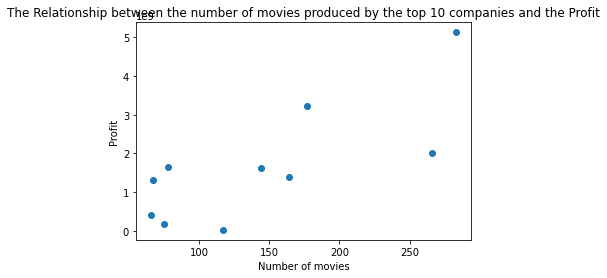

In [237]:

plt.scatter(m.head(10),Totals)
plt.title("The Relationship between the number of movies produced by the top 10 companies and the Profit")
plt.xlabel("Number of movies")
plt.ylabel("Profit")



They seem to be quite of a +ve correlation there 
However it doesnt always guarentee that high number of movies means the highest profits,but surely the number of movies has an effect

<a id='conclusions'></a>
## Conclusions

> Finally,The Conclusion is investing in producing a lot of movies doesnt always guarentee the highest profits 
as there are production companies and directors that have high number of movies but not necessarly the highest profits.
Deffinely there are some other factors that also affect the profits earned.




### Limitations
> This conclusion is not error proof as there were a lot of data being deleted after the cleaning process. Hence of course there is a bit of chance that there is a percentage of an error in this conlcusion. 
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [238]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1